# Práctica 1: Regresión lineal

#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from pandas.io.parsers import read_csv

### Carga de los datos

In [2]:
def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

## Parte 1: Regresión lineal con una variable

## Solución iterativa

In [3]:
# Hipótesis h0(x)
def fun_hipotesis(x, thetas):
    return thetas[0] + thetas[1] * x

In [4]:
# Calcula el descenso de gradiente
def descenso_gradiente(X, Y, m, alpha, num_iteraciones=1500):
    
    thetas = [0, 0]

    # Iteraciones para minimizar el coste
    for _ in range(num_iteraciones):
        
        sum_0 = sum_1 = 0
        
        for i in range(m):            
            sum_0 += fun_hipotesis(X[i], thetas) - Y[i]
            sum_1 += (fun_hipotesis(X[i], thetas) - Y[i]) * X[i]
        
        # Actualizamos valores de theta0 y theta1        
        thetas[0] = thetas[0] - (alpha / m) * sum_0
        thetas[1] = thetas[1] - (alpha / m) * sum_1
    
    # Dibuja la gráfica
    plt.plot(X, Y, "x",c='red')
    
    min_x = min(X)
    max_x = max (X)
    
    min_y = thetas[0] + thetas[1] * min_x
    max_y = thetas[0] + thetas[1] * max_x
    
    plt.plot([min_x, max_x], [min_y, max_y])
    
    #plt.savefig("resultado.pdf")
    #plt.figure()
    
    return thetas

In [5]:
# Función de coste total
def fun_coste(X, Y, m, thetas):
    sumatorio = 0
    for i in range(len(X)): # len(x) y m no es lo mismo?
        sumatorio += (fun_hipotesis(X[i], thetas) - Y[i])**2
    return (sumatorio / (2*m))

In [6]:
# Genera las rejillas para las gráficas
def make_data(X, Y):
    
    step = 0.1
    Theta0 = np.arange(-10, 10, step)
    Theta1 = np.arange(-1, 4, step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)

    Coste = np.empty_like(Theta0)

    for i in range(len(Theta0)):
        for j in range(len(Theta0[i])):
            Coste[i][j] = fun_coste(X, Y, m, [Theta0[i, j], Theta1[i, j]])
            
    return Theta0, Theta1, Coste

In [7]:
# Dibuja la función de coste 3D
def dibuja_coste(Theta0, Theta1, Coste):
    
    # Pinta la gráfica
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(-Theta1, Theta0, Coste, cmap=cm.coolwarm, 
                           linewidth=0, antialiased=False)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

In [8]:
# Dibuja la función de coste con una gráfica de contorno
def dibuja_contorno(Theta0, Theta1, Coste, thetas):
    plt.contour(Theta0, Theta1, Coste, np.logspace(-2, 3, 20), colors='blue')
    plt.plot(thetas[0],thetas[1],'x', color = 'red')

### Observando resultados

In [9]:
# Carga de los datos
datos = carga_csv('ex1data1.csv')

alpha = 0.01

X = datos[:, 0]
Y = datos [:, 1]

# Número filas y columnas
m = (len(X))
n = 2

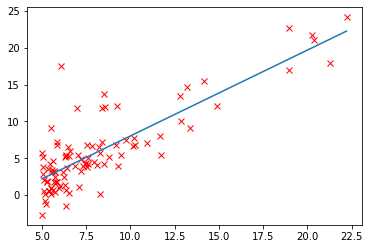

In [10]:
# Aplicamos descenso de gradiente
thetas = descenso_gradiente(X, Y, m, alpha, 1500)

In [11]:
# Observamos los valores theta0, theta1 y su coste
print("thetas[0]: " + str(thetas[0]))
print("thetas[1]: " + str(thetas[1]))
coste = fun_coste(X, Y, m, thetas)
print("Coste: ", coste)

thetas[0]: -3.63029143940436
thetas[1]: 1.166362350335582
Coste:  4.483388256587727


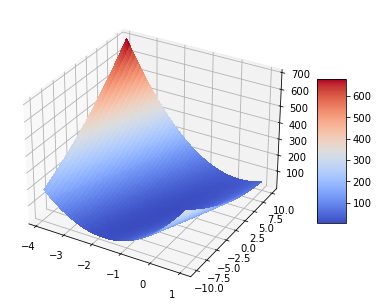

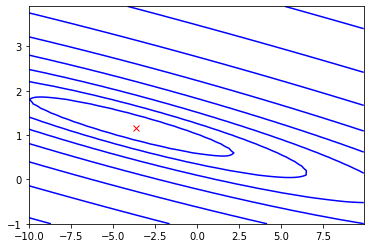

In [12]:
# Dibujamos la función de coste con un gráfico 3D y otro de rejilla
Theta0, Theta1, Coste = make_data(X, Y)

dibuja_coste(Theta0, Theta1, Coste)
dibuja_contorno(Theta0, Theta1, Coste, thetas)

## Solución vectorizada

In [13]:
# Calcula el descenso de gradiente
def descenso_gradiente_vec(X, Y, alpha, m, n, numinteraciones = 1500):
    thetas = np.zeros(n)
    
    for _ in range(numinteraciones):
        
        H = np.dot(X, thetas)
        Aux = (H - Y)
        
        for i in range(n):
            Aux_i = Aux * X[:, i]
            thetas[i] -= (alpha / m) * Aux_i.sum()
    
    # Elimino la fila de unos
    X = np.delete(X, 0, 1)
    
    # Dibuja la gráfica
    plt.plot(X, Y, "x",c='red')
    
    min_x = np.min(X)
    max_x = np.max(X)
    
    min_y = thetas[0] + thetas[1] * min_x
    max_y = thetas[0] + thetas[1] * max_x
    
    plt.plot([min_x, max_x], [min_y, max_y])        
    
    return thetas

In [14]:
# Función de coste total
def fun_coste_vec(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

In [15]:
# Genera las rejillas para las gráficas
def make_data_vec(t0_range, t1_range, X, Y):
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    Coste = np.empty_like(Theta0)
    
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = fun_coste_vec(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    
    return Theta0, Theta1, Coste

In [16]:
# Carga de los datos
datos = carga_csv('ex1data1.csv')
X = datos[:, :-1]
Y = datos[:, -1]

# Añadimos una columna de 1's a la X
X = np.hstack([np.ones([len(X), 1]), X])

m = np.shape(X)[0] # Filas = 47
n = np.shape(X)[1] # Columnas = 2

# alpha modificado para mejor resultado 
alpha = 0.01 

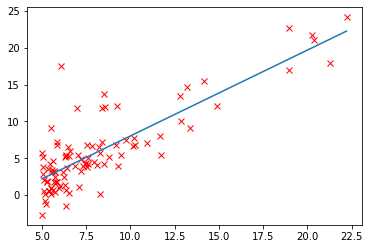

In [17]:
# Aplicamos descenso de gradiente
thetas = descenso_gradiente_vec(X, Y, alpha, m, n)

In [18]:
# Observamos los valores theta0, theta1 y su coste
print("thetas[0]: " + str(thetas[0]))
print("thetas[1]: " + str(thetas[1]))
coste = fun_coste_vec(X, Y, thetas)
print("Coste: ", coste)

thetas[0]: -3.6302914394043606
thetas[1]: 1.166362350335582
Coste:  4.483388256587726


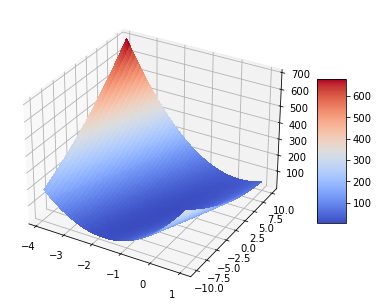

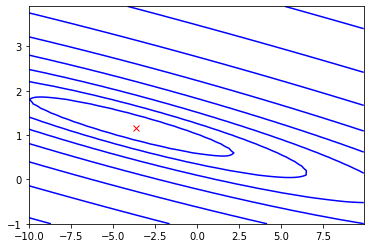

In [19]:
# Dibujamos la función de coste con un gráfico 3D y otro de rejilla
Theta0, Theta1, Coste = make_data_vec([-10, 10], [-1, 4], X, Y)

dibuja_coste(Theta0, Theta1, Coste)
dibuja_contorno(Theta0, Theta1, Coste, thetas)

## Parte 2: Regresión lineal con varias variables

In [20]:
# Ecuación para normalizar la X
def normalizar(X):
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma   
    
    return X_norm, mu, sigma

In [21]:
# Calcula la hipotesis: X[0]*theta0, X[1]*theta1...
def fun_hipotesis_2(X,thetas):
    return np.dot(X,thetas)

In [22]:
# Calcula el descenso de gradiente y dibuja la gráfica del coste
def descenso_gradiente_2(X, Y, alpha, m, n, numinteraciones = 1500):
    
    thetas = np.zeros(n)
    
    # Vector de costes para pintar la gráfica
    costes = []
    
    for j in range(numinteraciones):
        
        H = fun_hipotesis_2(X, thetas)
        Aux = (H - Y)
        
        for i in range(n):
            Aux_i = Aux * X[:, i]
            thetas[i] -= (alpha / m) * Aux_i.sum()
            
        costes.append(fun_coste_vec(X, Y, thetas))
            
    # Dibuja la gráfica
    plt.plot(costes)
    plt.ylabel("Coste")
    plt.xlabel("Iteraciones")
    plt.show()

    return thetas

In [23]:
# Calcula los valores thetas utilizando la ecuación normal
def ecuacion_normal(X,Y):
    
    X_transpose = np.transpose(X)
    thetas = np.linalg.inv(X_transpose.dot(X))
    thetas = thetas.dot(X_transpose)
    thetas = thetas.dot(Y)
    
    return thetas

### Observando resultados

In [24]:
# Carga de los datos
datos = carga_csv('ex1data2.csv')
X = datos[:, :-1]
Y = datos[:, -1]

#### Cálculo por la ecuación normal

In [25]:
# Añadimos una columna de 1's a la X
X_ec = np.hstack([np.ones([len(X), 1]), X])

# Calculamos las thetas
thetas_ec = ecuacion_normal(X_ec, Y)

# Calculamos la hipótesis
hipo_ec = fun_hipotesis_2([1, 1650, 3], thetas_ec)

print("Thetas ecuacion normal: ", thetas_ec)
print("Precio (1650 pies cuadrados, 3 habitaciones): ", hipo_ec)

Thetas ecuacion normal:  [89597.9095428    139.21067402 -8738.01911233]
Precio (1650 pies cuadrados, 3 habitaciones):  293081.46433489426


#### Cálculo por descenso de gradiente

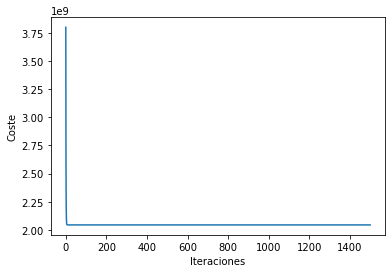

DESCENSO DE GRADIENTE PARA ALPHA =  1

Thetas:  [340412.65957447 109447.79646964  -6578.35485416]
Precio (1650 pies cuadrados, 3 habitaciones):  293081.4643348961

DIFERENCIA:  1.862645149230957e-09
El resultado es aceptable


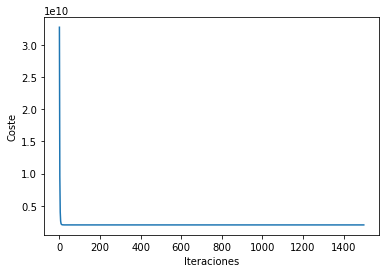

DESCENSO DE GRADIENTE PARA ALPHA =  0.3

Thetas:  [340412.65957447 109447.79646964  -6578.35485416]
Precio (1650 pies cuadrados, 3 habitaciones):  293081.46433489607

DIFERENCIA:  1.8044374883174896e-09
El resultado es aceptable


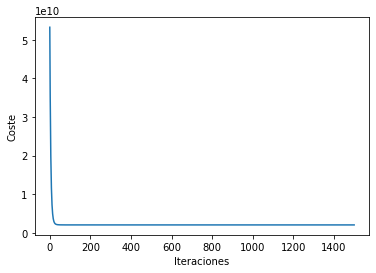

DESCENSO DE GRADIENTE PARA ALPHA =  0.1

Thetas:  [340412.65957447 109447.79646964  -6578.35485416]
Precio (1650 pies cuadrados, 3 habitaciones):  293081.46433489595

DIFERENCIA:  1.6880221664905548e-09
El resultado es aceptable


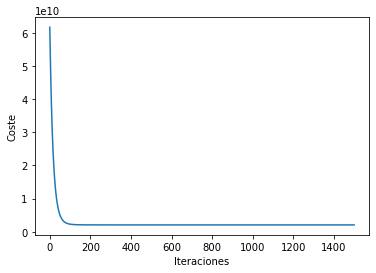

DESCENSO DE GRADIENTE PARA ALPHA =  0.03

Thetas:  [340412.65957447 109447.79634183  -6578.35472634]
Precio (1650 pies cuadrados, 3 habitaciones):  293081.46436300856

DIFERENCIA:  2.8114300221204758e-05
El resultado es aceptable


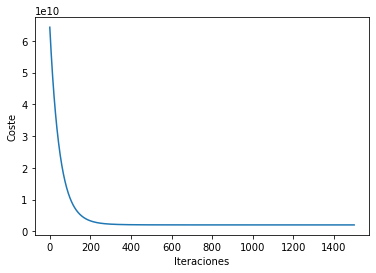

DESCENSO DE GRADIENTE PARA ALPHA =  0.01

Thetas:  [340412.56301439 109370.05670466  -6500.61509507]
Precio (1650 pies cuadrados, 3 habitaciones):  293098.4666757651

DIFERENCIA:  17.002340870851185
El resultado es aceptable


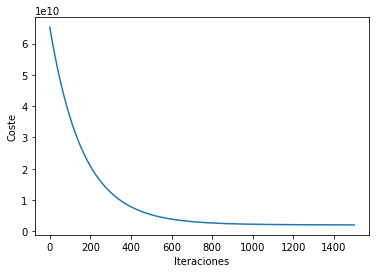

DESCENSO DE GRADIENTE PARA ALPHA =  0.003

Thetas:  [336656.50747404 101404.39797306   1374.58561585]
Precio (1650 pies cuadrados, 3 habitaciones):  291114.913657021

DIFERENCIA:  1966.5506778732524
El resultado es aceptable


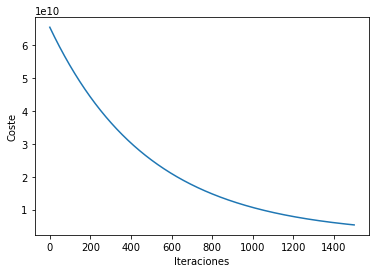

DESCENSO DE GRADIENTE PARA ALPHA =  0.001

Thetas:  [264513.31219629  74523.70638344  18454.16604565]
Precio (1650 pies cuadrados, 3 habitaciones):  227100.1059679978

DIFERENCIA:  65981.35836689646
El resultado no es aceptable


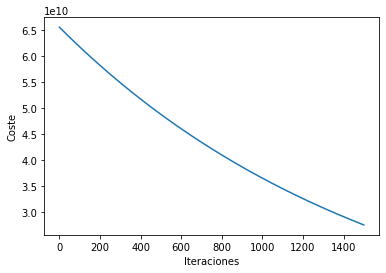

DESCENSO DE GRADIENTE PARA ALPHA =  0.0003

Thetas:  [123370.61842451  36370.060444    15525.6169793 ]
Precio (1650 pies cuadrados, 3 habitaciones):  103637.73723714772

DIFERENCIA:  189443.72709774654
El resultado no es aceptable


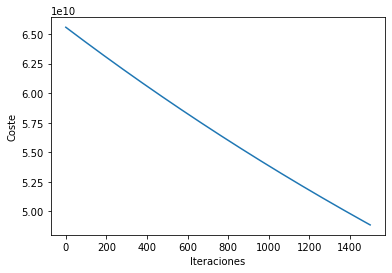

DESCENSO DE GRADIENTE PARA ALPHA =  0.0001

Thetas:  [47418.96581011 14437.3805063   7026.19844742]
Precio (1650 pies cuadrados, 3 habitaciones):  39390.684007814765

DIFERENCIA:  253690.7803270795
El resultado no es aceptable


In [26]:
# Normalizamos los datos
X_norm, mu, sigma = normalizar(X)

# Añadimos una columna de 1's a la X
X_norm = np.hstack([np.ones([len(X), 1]), X_norm])

# Número de filas y columnas
m = np.shape(X_norm)[0]
n = np.shape(X_norm)[1]

# Distintos valores de alpha
alphas = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]

for alpha in alphas:
    
    thetas_dg = descenso_gradiente_2(X_norm, Y, alpha, m, n, 1500)
    hipo_dg = fun_hipotesis_2([1, (1650-mu[0])/sigma[0], (3-mu[1])/sigma[1]], thetas_dg)
    
    print("DESCENSO DE GRADIENTE PARA ALPHA = ", alpha)
    print("\nThetas: ", thetas_dg)
    print("Precio (1650 pies cuadrados, 3 habitaciones): ", hipo_dg)
    
    diferencia = abs(hipo_ec - hipo_dg)
    print("\nDIFERENCIA: ", diferencia)
    
    # Consideramos que si la diferencia es superior al 1%, no es aceptable
    if(diferencia < hipo_ec/100):
        print("El resultado es aceptable")
    else:
        print("El resultado no es aceptable")
    

### Conclusión

Como observamos en los resultados, con 1500 iteraciones, a partir de alpha = 0.001, el resultado no es aceptable.

Resultado ecuación normal: 293081.46$

-> alpha = 0.001: Resultado descenso de gradiente: 227100.10$

-> alpha = 0.0003: Resultado descenso de gradiente: 103637.73$

-> alpha = 0.0001: Resultado descenso de gradiente: 39390.68$

Hemos considerado un margen de error del 1% respecto al resultado de la ecuación normal, que en este caso es de 2930$. 

Como vemos, para alpha = 0.001, la diferencia es de casi 66000$ y no llega a converger para el número de iteraciones propuestas.